# Retail Sales and Customer Shopping Trends

### Introduction

This project analyzes Retail Sales and Customer Shopping Trends to understand key factors that impact sales performance and customer behavior. By merging transaction data with customer demographics and shopping preferences, the analysis explores seasonal and holiday sales trends, popular products, and customer responses to promotions. The goal is to uncover insights that retailers can use to tailor their offerings, optimize marketing strategies, and adapt to seasonal demand patterns. Ultimately, this project provides a data-driven foundation for enhancing retail strategies, maximizing customer satisfaction, and boosting revenue.

### Questions
* What are the top-performing products and categories, and how do customer demographics (age, gender, and location) influence their sales performance?
* How do sales fluctuate throughout 2023, and are there specific months, seasons, or holidays when customers shop more?
* How do promotions and discounts impact sales across different categories, and do they encourage higher spending or more frequent purchases?
* How do customer behaviors—such as purchase frequency, previous purchases, subscription status, and review ratings—impact overall sales?

The datasets are from the website Kaggle.com

### Results

Before beginning we need to import the necessary libraries.

In [30]:
from platform import python_version
print(python_version())

3.12.4


In [31]:
# Import the pandas library for data manipulation and analysis
import pandas as pd

# Import the os module to perform operating system related tasks
import os

# Import the numpy library for numerical operations
import numpy as np

# Import the matplotlib library for creating static, animated, and interactive visualizations
import matplotlib.pyplot as plt

# Import the seaborn library for making statistical graphics, built on top of matplotlib
import seaborn as sns

# Import the sqlite3 module to work with SQLite databases
import sqlite3

# Import datetime module to work with datetime-related functions
from datetime import datetime

### Data Preprocessing and Cleaning
Data loading

In [32]:
# Read the CSV files from the 'data' folder
customer_df1 = pd.read_csv("../data/Customer_Shopping_Trends.csv")
retail_df2 = pd.read_csv("../data/Retail_Sales.csv")

To protect the data I will be working with copies of each csv.

In [33]:
customer_df = customer_df1.copy()
retail_df = retail_df2.copy()

### Inspect The Data
Explore the data to understand its structure

In [34]:
# Display the first 5 rows of the DataFrame
customer_df.head(5)

,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Payment Method,Frequency of Purchases
0,1,55,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,3.1,Yes,Express,Yes,Yes,14,Venmo,Fortnightly
1,2,19,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,3.1,Yes,Express,Yes,Yes,2,Cash,Fortnightly
2,3,50,Male,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,3.1,Yes,Free Shipping,Yes,Yes,23,Credit Card,Weekly
3,4,21,Male,Sandals,Footwear,90,Rhode Island,M,Maroon,Spring,3.5,Yes,Next Day Air,Yes,Yes,49,PayPal,Weekly
4,5,45,Male,Blouse,Clothing,49,Oregon,M,Turquoise,Spring,2.7,Yes,Free Shipping,Yes,Yes,31,PayPal,Annually


In [35]:
# Display the first 5 rows of the DataFrame
customer_df.tail(5)

,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Payment Method,Frequency of Purchases
3895,3896,40,Female,Hoodie,Clothing,28,Virginia,L,Turquoise,Summer,4.2,No,2-Day Shipping,No,No,32,Venmo,Weekly
3896,3897,52,Female,Backpack,Accessories,49,Iowa,L,White,Spring,4.5,No,Store Pickup,No,No,41,Bank Transfer,Bi-Weekly
3897,3898,46,Female,Belt,Accessories,33,New Jersey,L,Green,Spring,2.9,No,Standard,No,No,24,Venmo,Quarterly
3898,3899,44,Female,Shoes,Footwear,77,Minnesota,S,Brown,Summer,3.8,No,Express,No,No,24,Venmo,Weekly
3899,3900,52,Female,Handbag,Accessories,81,California,M,Beige,Spring,3.1,No,Store Pickup,No,No,33,Venmo,Quarterly


In [36]:
# Display the first 5 rows of the DataFrame
retail_df.head(5)

,Transaction ID,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount
0,1,2023-11-24,CUST001,Male,34,Beauty,3,50,150
1,2,2023-02-27,CUST002,Female,26,Clothing,2,500,1000
2,3,2023-01-13,CUST003,Male,50,Electronics,1,30,30
3,4,2023-05-21,CUST004,Male,37,Clothing,1,500,500
4,5,2023-05-06,CUST005,Male,30,Beauty,2,50,100


In [37]:
# Display the last 5 rows of the DataFrame
retail_df.tail(5)

,Transaction ID,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount
995,996,2023-05-16,CUST996,Male,62,Clothing,1,50,50
996,997,2023-11-17,CUST997,Male,52,Beauty,3,30,90
997,998,2023-10-29,CUST998,Female,23,Beauty,4,25,100
998,999,2023-12-05,CUST999,Female,36,Electronics,3,50,150
999,1000,2023-04-12,CUST1000,Male,47,Electronics,4,30,120


In [38]:
# Check if the DataFrame has null values, duplicates, or any issues.
customer_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3900 entries, 0 to 3899
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Customer ID             3900 non-null   int64  
 1   Age                     3900 non-null   int64  
 2   Gender                  3900 non-null   object 
 3   Item Purchased          3900 non-null   object 
 4   Category                3900 non-null   object 
 5   Purchase Amount (USD)   3900 non-null   int64  
 6   Location                3900 non-null   object 
 7   Size                    3900 non-null   object 
 8   Color                   3900 non-null   object 
 9   Season                  3900 non-null   object 
 10  Review Rating           3900 non-null   float64
 11  Subscription Status     3900 non-null   object 
 12  Shipping Type           3900 non-null   object 
 13  Discount Applied        3900 non-null   object 
 14  Promo Code Used         3900 non-null   

In [39]:
# Check if the DataFrame has null values, duplicates, or any issues.
retail_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Transaction ID    1000 non-null   int64 
 1   Date              1000 non-null   object
 2   Customer ID       1000 non-null   object
 3   Gender            1000 non-null   object
 4   Age               1000 non-null   int64 
 5   Product Category  1000 non-null   object
 6   Quantity          1000 non-null   int64 
 7   Price per Unit    1000 non-null   int64 
 8   Total Amount      1000 non-null   int64 
dtypes: int64(5), object(4)
memory usage: 70.4+ KB


Since the datasets are clean. Now I will introduce NaN values, duplicates, and leading/trailing whitespace into the datasets
to simulate real-world data issues and practice data cleaning techniques.


In [40]:
# Add NaN values in Customer_df
customer_df.loc[3:4, 'Shipping Type'] = np.nan
# Duplicate the first row of the Customer_df
customer_df = pd.concat([customer_df, customer_df.iloc[[0]]], ignore_index=True)
# Add whitespace Adding whitespace to the second row of custmer_df
customer_df.loc[1:2, 'Payment Method'] = '   '
customer_df.head()

,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Payment Method,Frequency of Purchases
0,1,55,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,3.1,Yes,Express,Yes,Yes,14,Venmo,Fortnightly
1,2,19,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,3.1,Yes,Express,Yes,Yes,2,,Fortnightly
2,3,50,Male,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,3.1,Yes,Free Shipping,Yes,Yes,23,,Weekly
3,4,21,Male,Sandals,Footwear,90,Rhode Island,M,Maroon,Spring,3.5,Yes,NaN,Yes,Yes,49,PayPal,Weekly
4,5,45,Male,Blouse,Clothing,49,Oregon,M,Turquoise,Spring,2.7,Yes,NaN,Yes,Yes,31,PayPal,Annually


In [41]:
# Add NaN values in retail_df
retail_df.loc[2:4, 'Age'] = np.nan
# Duplicate the first row of the retail_df
retail_df = pd.concat([retail_df, retail_df.iloc[[0]]], ignore_index=True)
# Add whitespace Adding whitespace to the fourth row of retail_df
retail_df.loc[3, 'Product Category'] = '   '  
retail_df.head(5)

,Transaction ID,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount
0,1,2023-11-24,CUST001,Male,34.0,Beauty,3,50,150
1,2,2023-02-27,CUST002,Female,26.0,Clothing,2,500,1000
2,3,2023-01-13,CUST003,Male,NaN,Electronics,1,30,30
3,4,2023-05-21,CUST004,Male,NaN,,1,500,500
4,5,2023-05-06,CUST005,Male,NaN,Beauty,2,50,100


### Data Cleaning 
Check for missing values, duplicates and any issues in the datasets.

In [42]:
# Check for missing values in customer_df
customer_df.isna()
# Check for duplicate rows
duplicates = customer_df.duplicated()
# Check if each cell contains only whitespace
only_whitespace = customer_df.map(lambda x: isinstance(x, str) and x.isspace())
customer_df.head()

,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Payment Method,Frequency of Purchases
0,1,55,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,3.1,Yes,Express,Yes,Yes,14,Venmo,Fortnightly
1,2,19,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,3.1,Yes,Express,Yes,Yes,2,,Fortnightly
2,3,50,Male,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,3.1,Yes,Free Shipping,Yes,Yes,23,,Weekly
3,4,21,Male,Sandals,Footwear,90,Rhode Island,M,Maroon,Spring,3.5,Yes,NaN,Yes,Yes,49,PayPal,Weekly
4,5,45,Male,Blouse,Clothing,49,Oregon,M,Turquoise,Spring,2.7,Yes,NaN,Yes,Yes,31,PayPal,Annually


In [43]:
# Check for missing values in retail_df
retail_df.isna()
# Check for duplicate rows
duplicates = retail_df.duplicated()
# Check if each cell contains only whitespace
only_whitespace = retail_df.map(lambda x: isinstance(x, str) and x.isspace())
retail_df.head(5)

,Transaction ID,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount
0,1,2023-11-24,CUST001,Male,34.0,Beauty,3,50,150
1,2,2023-02-27,CUST002,Female,26.0,Clothing,2,500,1000
2,3,2023-01-13,CUST003,Male,NaN,Electronics,1,30,30
3,4,2023-05-21,CUST004,Male,NaN,,1,500,500
4,5,2023-05-06,CUST005,Male,NaN,Beauty,2,50,100


I'm going to handdle missing values, dropping dupliceted rows and stripping whitespace from both datasets

In [44]:
# Fill missing values for string columns (object type) with 'Unknown'
customer_df[customer_df.select_dtypes(include='object').columns] = customer_df.select_dtypes(include='object').fillna('Unknown')
# Drop duplicated rows
customer_df.drop_duplicates(inplace=True)
# Strip whitespace from 'Location' column in customer_df
fill_value = "Unknown"
customer_df = customer_df.map(lambda x: fill_value if isinstance(x, str) and x.isspace() else x)
customer_df.head()

,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Payment Method,Frequency of Purchases
0,1,55,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,3.1,Yes,Express,Yes,Yes,14,Venmo,Fortnightly
1,2,19,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,3.1,Yes,Express,Yes,Yes,2,Unknown,Fortnightly
2,3,50,Male,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,3.1,Yes,Free Shipping,Yes,Yes,23,Unknown,Weekly
3,4,21,Male,Sandals,Footwear,90,Rhode Island,M,Maroon,Spring,3.5,Yes,Unknown,Yes,Yes,49,PayPal,Weekly
4,5,45,Male,Blouse,Clothing,49,Oregon,M,Turquoise,Spring,2.7,Yes,Unknown,Yes,Yes,31,PayPal,Annually


In [45]:
# Fill missing values for numeric columns with the median
retail_df[retail_df.select_dtypes(include='number').columns] = retail_df.select_dtypes(include='number').apply(lambda x: x.fillna(x.median()))
# Drop duplicated rows
retail_df.drop_duplicates(inplace=True)
# Strip whitespace from 'Product Category' column in customer_df
fill_value = "Unknown"
retail_df = retail_df.map(lambda x: fill_value if isinstance(x, str) and x.isspace() else x)
retail_df.head(5)

,Transaction ID,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount
0,1,2023-11-24,CUST001,Male,34.0,Beauty,3,50,150
1,2,2023-02-27,CUST002,Female,26.0,Clothing,2,500,1000
2,3,2023-01-13,CUST003,Male,42.0,Electronics,1,30,30
3,4,2023-05-21,CUST004,Male,42.0,Unknown,1,500,500
4,5,2023-05-06,CUST005,Male,42.0,Beauty,2,50,100


### Data Preparation for Merging

Create 'Sales' column for clarity, and renaming 'Item Purchased' column as 'Product'

In [46]:
# Create 'Sales' column as the sum of 'Purchase Amount (USD)' and 'Total Amount'
retail_df['Sales'] = customer_df['Purchase Amount (USD)'] + retail_df['Total Amount']
# Calculate Sales by multiplying Quantity and Price per Unit
retail_df['Quantity'] = (retail_df['Sales'] / retail_df['Price per Unit']).round()
# Rename 'Item Purchased' column as 'Product' for easier readability
customer_df.rename(columns={'Item Purchased': 'Product'}, inplace=True)

Before merging I will format the 'Customer ID' in customer_df to match the 'Customer ID' format in retail_df. And drop unecessary columns from both datasets.

In [47]:
# Format Customer IDs in customer_df
customer_df['Customer ID'] = 'CUST' + customer_df['Customer ID'].astype(str).str.zfill(3)
# Convert 'Customer ID' to string type in both DataFrames
customer_df['Customer ID'] = customer_df['Customer ID'].astype(str)
retail_df['Customer ID'] = retail_df['Customer ID'].astype(str)
# Remove 'CUST' prefix and convert to integer
# Remove the 'CUST' prefix from the 'Customer ID' column to retain only numeric values.
# This allows us to organize the IDs as integers, ensuring a clean, sequential index.
customer_df['Customer ID'] = customer_df['Customer ID'].str.replace('CUST', '').astype(int)
retail_df['Customer ID'] = retail_df['Customer ID'].str.replace('CUST', '').astype(int)

# Lists of columns to drop from customer_df
customer_columns_to_drop = ['Size', 'Color', 'Shipping Type', 'Payment Method', 'Purchase Amount (USD)']
customer_df.drop(columns=customer_columns_to_drop, axis=1, inplace=True)

# Columns to drop from retail_df
retail_columns_to_drop = ['Age', 'Gender', 'Transaction ID', 'Product Category', 'Total Amount']
retail_df.drop(columns=retail_columns_to_drop, axis=1, inplace=True)

### Merge the two datasets customer_df and retail_df using outer join on the common key column 'Customer ID'

In [48]:
# Merge datasets using outer join on 'Customer ID'
merged_df = pd.merge(customer_df, retail_df, on=['Customer ID'], how='outer', suffixes=('_customer', '_retail'))
# Sort by 'Customer ID' to ensure they are organized in ascending order
merged_df.sort_values(by='Customer ID', inplace=True)
# Reset the index to have a clean index that aligns with sorted 'Customer ID'
merged_df.reset_index(drop=True, inplace=True)
# Convert Customer ID back to original format with 'CUST' prefix
# merged_df['Customer ID'] = 'CUST' + merged_df['Customer ID'].astype(str)

merged_df.head()

,Customer ID,Age,Gender,Product,Category,Location,Season,Review Rating,Subscription Status,Discount Applied,Promo Code Used,Previous Purchases,Frequency of Purchases,Date,Quantity,Price per Unit,Sales
0,1,55,Male,Blouse,Clothing,Kentucky,Winter,3.1,Yes,Yes,Yes,14,Fortnightly,2023-11-24,4.0,50.0,203.0
1,2,19,Male,Sweater,Clothing,Maine,Winter,3.1,Yes,Yes,Yes,2,Fortnightly,2023-02-27,2.0,500.0,1064.0
2,3,50,Male,Jeans,Clothing,Massachusetts,Spring,3.1,Yes,Yes,Yes,23,Weekly,2023-01-13,3.0,30.0,103.0
3,4,21,Male,Sandals,Footwear,Rhode Island,Spring,3.5,Yes,Yes,Yes,49,Weekly,2023-05-21,1.0,500.0,590.0
4,5,45,Male,Blouse,Clothing,Oregon,Spring,2.7,Yes,Yes,Yes,31,Annually,2023-05-06,3.0,50.0,149.0


In [49]:
merged_df.shape

(3900, 17)

Add a new 'Holiday' column to merged_df by creating a holiday DataFrame and merging it with merged_df on the 'Date' column.

In [50]:
# Create a dictionary of holidays with dates
holidays_2023 = {
    datetime(2023, 1, 1): "New Year's Day",
    datetime(2023, 2, 14): "Valentine's Day",
    datetime(2023, 4, 9): "Easter Sunday",
    datetime(2023, 5, 14): "Mother's Day",
    datetime(2023, 6, 18): "Father's Day",
    datetime(2023, 7, 4): "Independence Day",
    datetime(2023, 10, 31): "Halloween",
    datetime(2023, 11, 23): "Thanksgiving",
    datetime(2023, 11, 24): "Black Friday",
    datetime(2023, 11, 27): "Cyber Monday",
    datetime(2023, 12, 24): "Christmas Eve",
    datetime(2023, 12, 25): "Christmas Day",
    datetime(2023, 12, 31): "New Year's Eve"
}

# Converte dictionary to DataFrame
holidays_df = pd.DataFrame(list(holidays_2023.items()), columns=['Date', 'Holiday'])

# Ensure both 'Date' columns are in datetime format
holidays_df['Date'] = pd.to_datetime(holidays_df['Date'], errors='coerce')
merged_df['Date'] = pd.to_datetime(merged_df['Date'], errors='coerce')

# Merge merged_df with holiday_df on 'Date' to add 'Holiday' column
merged_df = merged_df.merge(holidays_df, on='Date', how='left')
merged_df['Holiday'] = merged_df['Holiday'].fillna('No Holiday')

Reorder the columns of merged_df to enhance readability and organization.

In [51]:
# Reorder the columns for merged_df_copy
merged_df_copy = merged_df[['Customer ID', 'Age', 'Gender', 'Product','Category',
                            'Location', 'Season', 'Review Rating', 'Subscription Status',
                            'Discount Applied', 'Promo Code Used', 'Previous Purchases', 
                            'Frequency of Purchases','Date', 'Quantity',
                            'Price per Unit', 'Sales', 'Holiday']]
merged_df.columns

Index(['Customer ID', 'Age', 'Gender', 'Product', 'Category', 'Location',
       'Season', 'Review Rating', 'Subscription Status', 'Discount Applied',
       'Promo Code Used', 'Previous Purchases', 'Frequency of Purchases',
       'Date', 'Quantity', 'Price per Unit', 'Sales', 'Holiday'],
      dtype='object')

I'am going to resolve missing values after merge

In [52]:
# Fill missing values for string columns (object type) with 'Unknown'
merged_df.loc[:, merged_df.select_dtypes(include='object').columns] = merged_df.select_dtypes(include='object').fillna('Unknown')
# Fill missing values for numeric columns with the median
merged_df.loc[:, merged_df.select_dtypes(include='number').columns] = merged_df.select_dtypes(include='number').apply(lambda x: x.fillna(x.median()))
# Set a default date for missing values in the 'Date' column
merged_df['Date'] = merged_df['Date'].fillna(pd.Timestamp('2024-01-01'))
# Sort the DataFrame by 'Date' in ascending order
merged_df = merged_df.sort_values(by='Date', ascending=True)
# Check for null values
merged_df.isnull().sum()

Customer ID               0
Age                       0
Gender                    0
Product                   0
Category                  0
Location                  0
Season                    0
Review Rating             0
Subscription Status       0
Discount Applied          0
Promo Code Used           0
Previous Purchases        0
Frequency of Purchases    0
Date                      0
Quantity                  0
Price per Unit            0
Sales                     0
Holiday                   0
dtype: int64

There are no null values

### Data Preparation for Analysis

Data Formatting

In [53]:
# Check the data type of the columns in the merged_df
merged_df.dtypes

Customer ID                        int64
Age                                int64
Gender                            object
Product                           object
Category                          object
Location                          object
Season                            object
Review Rating                    float64
Subscription Status               object
Discount Applied                  object
Promo Code Used                   object
Previous Purchases                 int64
Frequency of Purchases            object
Date                      datetime64[ns]
Quantity                         float64
Price per Unit                   float64
Sales                            float64
Holiday                           object
dtype: object

In [54]:
# Convert columns from merged_df to appropriate types
# Convert selected columns to 'category'
categorical_columns = ['Gender', 'Product', 'Category', 'Location', 'Holiday']
for col in categorical_columns:
    merged_df[col] = merged_df[col].astype('category')

# Convert the 'Date' column to datetime format    
merged_df['Date'] = pd.to_datetime(merged_df['Date'])

# Convert 'Quantity', 'Previous Purchases', and 'Age' to integers
merged_df['Quantity'] = pd.to_numeric(merged_df['Quantity']).fillna(0).astype(int)
merged_df['Previous Purchases'] = pd.to_numeric(merged_df['Previous Purchases']).fillna(0).astype(int)
merged_df['Age'] = pd.to_numeric(merged_df['Age']).fillna(0).astype(int)
merged_df['Customer ID'] = pd.to_numeric(merged_df['Customer ID']).astype(int)

# Convert Yes/No columns to boolean
yes_no_columns = ['Subscription Status', 'Discount Applied', 'Promo Code Used']
for col in yes_no_columns:
    merged_df[col] = merged_df[col].map({'Yes': True, 'No': False}).astype(bool)
merged_df.dtypes

Customer ID                        int64
Age                                int64
Gender                          category
Product                         category
Category                        category
Location                        category
Season                            object
Review Rating                    float64
Subscription Status                 bool
Discount Applied                    bool
Promo Code Used                     bool
Previous Purchases                 int64
Frequency of Purchases            object
Date                      datetime64[ns]
Quantity                           int64
Price per Unit                   float64
Sales                            float64
Holiday                         category
dtype: object

In [55]:
# Extract year, month, and day into new columns
merged_df['Year'] = merged_df['Date'].dt.year
merged_df['Month'] = merged_df['Date'].dt.month
merged_df['Day'] = merged_df['Date'].dt.day

# Categorize "Age" groups for clearer demographic insights
# Define age bins and labels
bins = [0, 18, 35, 50, 65, float('inf')]
labels = ["Child", "Young Adult", "Adult", "Senior", "Elderly"]
merged_df['Age Group'] = pd.cut(merged_df['Age'], bins=bins, labels=labels)

# Define bins and labels for categorizing "Previous Purchases" into groups
bins = [0, 10, 20, 30, 40, 50, merged_df['Previous Purchases'].max() + 1]
labels = ['0-10', '11-20', '21-30', '31-40', '41-50', '50+']  # Adjusted labels
# Create 'Previous Purchases Group' column
merged_df['Previous Purchases Group'] = pd.cut(merged_df['Previous Purchases'], bins=bins, labels=labels, right=False)

In [56]:
# Define the path to save the merged_df as a CSV file
data_folder_path = r'C:\Users\Code Lou\OneDrive\Desktop\Retail-Sales-and-Customer-Shopping-Trends\data'
# Sort the DataFrame by 'Customer ID'
merged_df = merged_df.sort_values(by=['Customer ID'], ascending=True)

# Reset the index
merged_df.reset_index(drop=True, inplace=True)

# Save the merged DataFrame to a CSV file in the specified folder
merged_df.to_csv(os.path.join(data_folder_path, 'merged_data.csv'))
merged_df.head()

,Customer ID,Age,Gender,Product,Category,Location,Season,Review Rating,Subscription Status,Discount Applied,...,Date,Quantity,Price per Unit,Sales,Holiday,Year,Month,Day,Age Group,Previous Purchases Group
0,1,55,Male,Blouse,Clothing,Kentucky,Winter,3.1,True,True,...,2023-11-24,4,50.0,203.0,Black Friday,2023,11,24,Senior,11-20
1,2,19,Male,Sweater,Clothing,Maine,Winter,3.1,True,True,...,2023-02-27,2,500.0,1064.0,No Holiday,2023,2,27,Young Adult,0-10
2,3,50,Male,Jeans,Clothing,Massachusetts,Spring,3.1,True,True,...,2023-01-13,3,30.0,103.0,No Holiday,2023,1,13,Adult,21-30
3,4,21,Male,Sandals,Footwear,Rhode Island,Spring,3.5,True,True,...,2023-05-21,1,500.0,590.0,No Holiday,2023,5,21,Young Adult,41-50
4,5,45,Male,Blouse,Clothing,Oregon,Spring,2.7,True,True,...,2023-05-06,3,50.0,149.0,No Holiday,2023,5,6,Adult,31-40


In [57]:
merged_df.head()

,Customer ID,Age,Gender,Product,Category,Location,Season,Review Rating,Subscription Status,Discount Applied,...,Date,Quantity,Price per Unit,Sales,Holiday,Year,Month,Day,Age Group,Previous Purchases Group
0,1,55,Male,Blouse,Clothing,Kentucky,Winter,3.1,True,True,...,2023-11-24,4,50.0,203.0,Black Friday,2023,11,24,Senior,11-20
1,2,19,Male,Sweater,Clothing,Maine,Winter,3.1,True,True,...,2023-02-27,2,500.0,1064.0,No Holiday,2023,2,27,Young Adult,0-10
2,3,50,Male,Jeans,Clothing,Massachusetts,Spring,3.1,True,True,...,2023-01-13,3,30.0,103.0,No Holiday,2023,1,13,Adult,21-30
3,4,21,Male,Sandals,Footwear,Rhode Island,Spring,3.5,True,True,...,2023-05-21,1,500.0,590.0,No Holiday,2023,5,21,Young Adult,41-50
4,5,45,Male,Blouse,Clothing,Oregon,Spring,2.7,True,True,...,2023-05-06,3,50.0,149.0,No Holiday,2023,5,6,Adult,31-40


### Exploratory Data Analysis (EDA)

In [58]:
# General Overview of the merged_df
merged_df.describe()

,Customer ID,Age,Review Rating,Previous Purchases,Date,Quantity,Price per Unit,Sales,Year,Month,Day
count,3900.000000,3900.000000,3900.000000,3900.000000,3900,3900.000000,3900.000000,3900.000000,3900.000000,3900.000000,3900.000000
mean,1950.500000,44.068462,3.749949,25.351538,2023-11-15 08:06:38.769230592,3.907949,83.305128,280.193077,2023.744103,2.422821,4.669231
min,1.000000,18.000000,2.500000,1.000000,2023-01-01 00:00:00,1.000000,25.000000,46.000000,2023.000000,1.000000,1.000000
25%,975.750000,31.000000,3.100000,13.000000,2023-12-23 00:00:00,4.000000,50.000000,199.000000,2023.000000,1.000000,1.000000
50%,1950.500000,44.000000,3.700000,25.000000,2024-01-01 00:00:00,4.000000,50.000000,199.000000,2024.000000,1.000000,1.000000
75%,2925.250000,57.000000,4.400000,38.000000,2024-01-01 00:00:00,4.000000,50.000000,199.000000,2024.000000,1.000000,1.000000
max,3900.000000,70.000000,5.000000,50.000000,2024-01-01 00:00:00,8.000000,500.000000,2098.000000,2024.000000,12.000000,31.000000
std,1125.977353,15.207589,0.716223,14.447125,NaN,0.833997,111.517370,315.360870,0.436420,2.987783,7.695429


### Calculate a General Sales Overview to understand the data

In [59]:
# Calculate the Total Sales
total_sales = merged_df['Sales'].sum()
# Calculate the Average Sales Per Customer
avg_sales_per_customer = merged_df.groupby('Customer ID', observed=False)['Sales'].mean()
# Calculate the Average Sales Per Purchase (transaction)
avg_sales_per_purchase = merged_df['Sales'].mean()
avg_sales_per_quantity = (merged_df['Sales'] / merged_df['Quantity']).mean()
# Output the results
print("Total Sales:", total_sales)
print("Average Sales Per Customer:", avg_sales_per_customer)
print("Average Sales Per Purchase:", avg_sales_per_purchase)
print("Average Sales Per Quantity:", avg_sales_per_quantity)


Total Sales: 1092753.0
Average Sales Per Customer: Customer ID
1        203.0
2       1064.0
3        103.0
4        590.0
5        149.0
         ...  
3896     199.0
3897     199.0
3898     199.0
3899     199.0
3900     199.0
Name: Sales, Length: 3900, dtype: float64
Average Sales Per Purchase: 280.19307692307694
Average Sales Per Quantity: 86.24837545787545


### Find the top Selling Products/Categories by analyzing the Average Sales across different Customer demographics (Age, Gender and Location)

Define a function that creates a DataFrame specifically for top-performing products and categories as well as customer demographic groups

In [60]:
# Define a function that creates DataFrames for top-performing products, categories, and customer demographic groups.
def top_performers_by_sales(merged_df):
# Select relevant columns for analysis
    data = merged_df[['Product', 'Category', 'Sales', 'Customer ID', 'Age Group', 'Gender', 'Location']]
    
# Calculate Average Sales per Product and Category
    product_category_sales = data.groupby(['Product', 'Category'], observed=True)['Sales'].mean().reset_index()
    product_category_sales.columns = ['Product', 'Category', 'Average Sales']
    product_category_sales = product_category_sales.sort_values(by='Average Sales', ascending=False)
    
# Calculate Average Sales by Gender and Age
    gender_age_sales = data.groupby(['Gender', 'Age Group'], observed=True)['Sales'].sum().reset_index()
    gender_age_sales.columns = ['Gender', 'Age Group', 'Average Sales']
    gender_age_sales = gender_age_sales.sort_values(by='Average Sales', ascending=False)
    
# Calculate Average Sales by Category and Location
    location_sales = data.groupby(['Category', 'Location'], observed=True)['Sales'].mean().reset_index()
    location_sales = location_sales.sort_values(by='Sales', ascending=False)
    
# Return all DataFrames
    return product_category_sales, gender_age_sales, location_sales
# Apply the function
product_category_sales, gender_age_sales, location_sales = top_performers_by_sales(merged_df)

print(product_category_sales, gender_age_sales, location_sales)

       Product     Category  Average Sales
4         Coat    Outerwear     324.621118
18      Shorts     Clothing     311.324841
3        Boots     Footwear     310.076389
14     Sandals     Footwear     309.950000
24     T-shirt     Clothing     300.000000
10      Jacket    Outerwear     299.938650
5        Dress     Clothing     298.391566
9       Hoodie     Clothing     294.496689
20    Sneakers     Footwear     292.475862
12     Jewelry  Accessories     289.584795
16       Shirt     Clothing     289.514793
17       Shoes     Footwear     289.506667
19       Skirt     Clothing     289.493671
13       Pants     Clothing     289.005848
11       Jeans     Clothing     284.911290
7      Handbag  Accessories     283.705882
6       Gloves  Accessories     268.714286
23     Sweater     Clothing     261.628049
15       Scarf  Accessories     260.420382
8          Hat  Accessories     251.090909
22  Sunglasses  Accessories     248.900621
21       Socks     Clothing     242.610063
0     Backp

### I will visualize the Results 

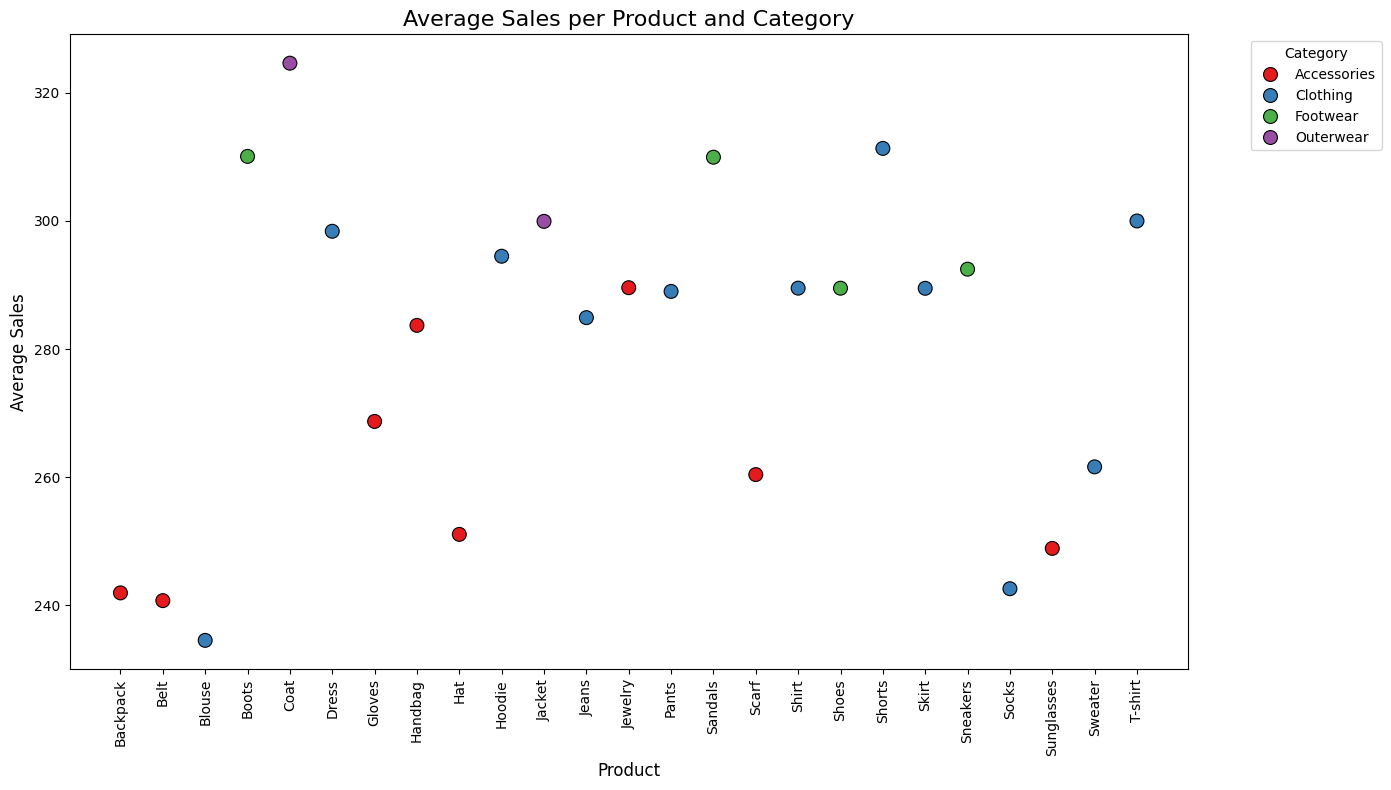

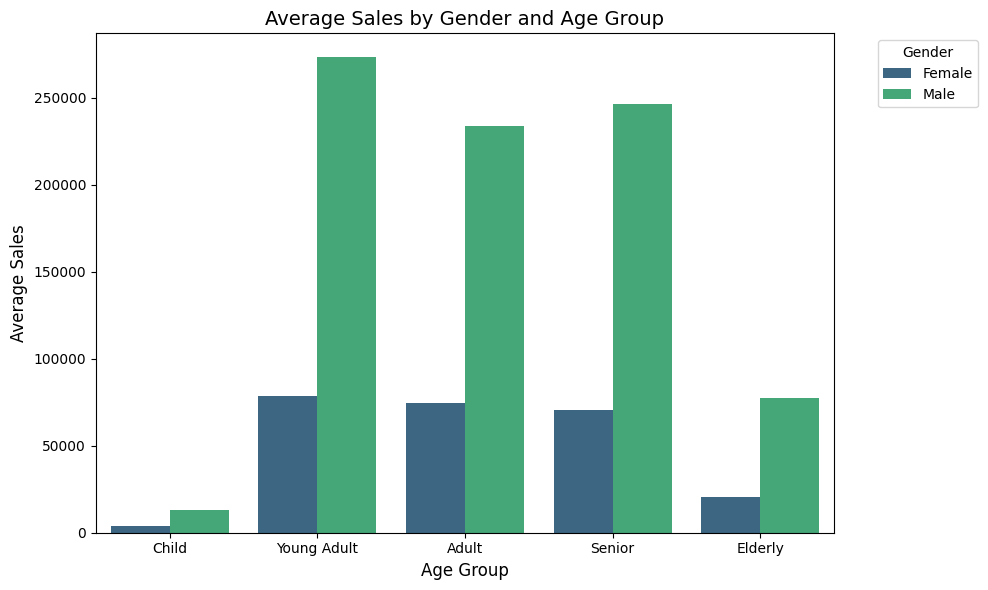

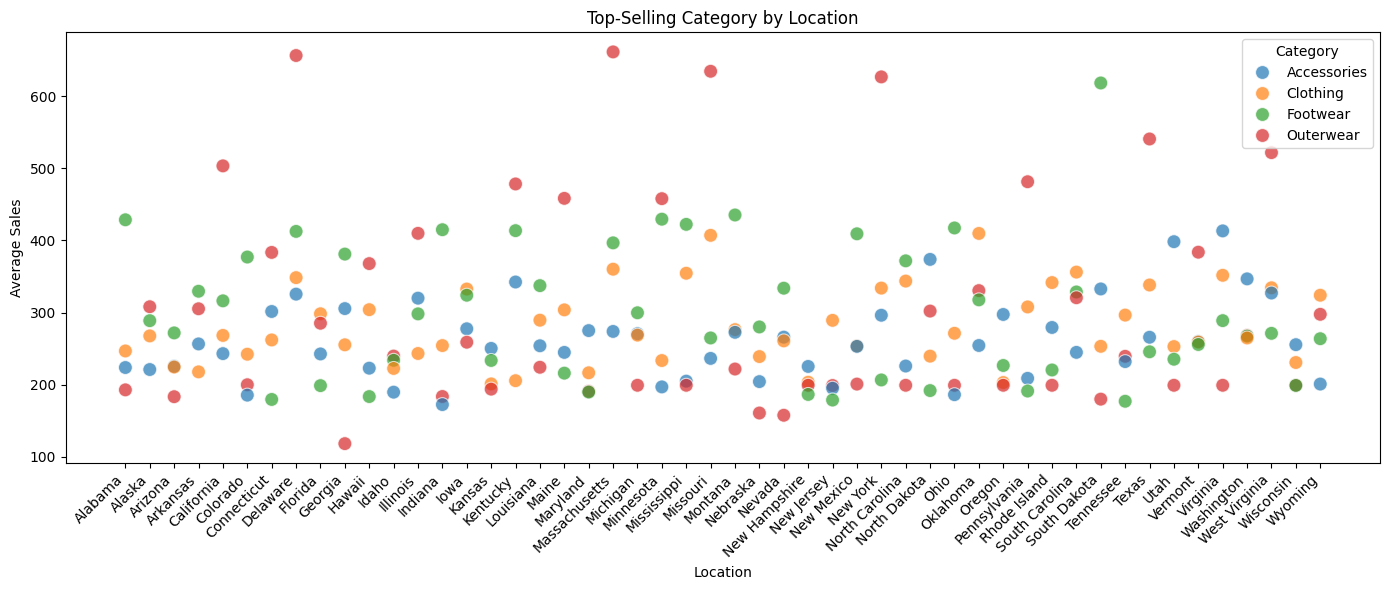

In [61]:
# Scatter Plot for Average Sales per Product and Category
plt.figure(figsize=(14, 8))
sns.scatterplot(data=product_category_sales, x='Product', y='Average Sales', hue='Category', palette='Set1', s=100, edgecolor='black')
# Add Titles and Labels
plt.title('Average Sales per Product and Category', fontsize=16)
plt.xlabel('Product', fontsize=12)
plt.ylabel('Average Sales', fontsize=12)
plt.xticks(rotation=90)  # Rotate x-axis labels to fit product names
plt.legend(title='Category', bbox_to_anchor=(1.05, 1), loc='upper left')
# Display plot
plt.tight_layout()
plt.show()


# Gender and Age Group Sales Visualization
plt.figure(figsize=(10, 6))
# Adjusted the legend title to reflect 'Gender'
sns.barplot(data=gender_age_sales, x='Age Group', y='Average Sales', hue='Gender', palette='viridis')
# Improved the title, labels, and layout
plt.title('Average Sales by Gender and Age Group', fontsize=14)
plt.xlabel('Age Group', fontsize=12)
plt.ylabel('Average Sales', fontsize=12)
# Adjusted the legend position and title
plt.legend(title='Gender', bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=10)
# Ensure proper spacing for the plot
plt.tight_layout()
# Display the plot
plt.show()

# Scatter plot for total sales by category and location
plt.figure(figsize=(14, 6))
sns.scatterplot(data=location_sales, x='Location', y='Sales', hue='Category', s=100, alpha=0.7)
# Add titles and labels
plt.title('Top-Selling Category by Location')
plt.xlabel('Location')
plt.ylabel('Average Sales')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for readability
plt.legend(title='Category')
plt.tight_layout()
plt.show()

### Findings and Insights

* The scatter plot of top Products and Categories highlights that products in the "Outerwear" category, such as 'Coat', achieve the highest average sales, significantly outperforming items in other categories like "Footwear" and "Clothing." This indicates a strong customer preference for specific product types within certain categories.

* The bar plot of Gender and Age Group reveals that young-adult and senior male customers contribute the most to average sales, suggesting that targeted marketing strategies for these demographic groups could further enhance sales performance.

* The scatter plot of Regional Sales by category and location shows that regions such as New York, Tennessee, and Michigan are top-performing areas, with "Outerwear" and "Footwear" leading in popularity. These insights can inform location-specific inventory and promotional strategies to maximize revenue.


### Analyze Seasonal, Monthly and Holiday Average Sales

In [62]:
# The average sales by months
# Filter the data for the year 2023
filtered_2023 = merged_df[merged_df['Date'].dt.year == 2023].reset_index()

# Calculate the average sales by Month
merged_df.loc[:, 'Month'] = merged_df['Date'].dt.month
monthly_category_sales = merged_df.groupby(['Month'], observed=False)['Sales'].mean().reset_index()
monthly_category_sales.rename(columns={'Sales': 'Average Sales'}, inplace=True)

# The average sales by season of the year (2023)
# Calculate the average sales by season
seasonal_category_sales = merged_df.groupby(['Season'], observed=False)['Sales'].mean().reset_index()
seasonal_category_sales.rename(columns={'Sales': 'Average Sales'}, inplace=True)

# The average sales by holiday
# Filter out "No Holiday" rows and grouping by holiday to calculate average sales
holiday_sales = merged_df[merged_df['Holiday'] != 'No Holiday']
holiday_sales = merged_df.groupby(['Holiday'], observed=False)['Sales'].mean().reset_index()
holiday_sales.rename(columns={'Sales': 'Average Sales'}, inplace=True)

# Concatenate all DataFrames into one
combined_sales = pd.concat([monthly_category_sales, seasonal_category_sales, holiday_sales], ignore_index=True)
combined_sales

,Month,Average Sales,Season,Holiday
0,1.0,207.771323,NaN,NaN
1,2.0,575.611765,NaN,NaN
2,3.0,461.027397,NaN,NaN
3,4.0,452.906977,NaN,NaN
4,5.0,561.219048,NaN,NaN
5,6.0,534.389610,NaN,NaN
6,7.0,551.875000,NaN,NaN
7,8.0,454.819149,NaN,NaN
8,9.0,417.446154,NaN,NaN
9,10.0,547.718750,NaN,NaN


### I will Visualize the Results

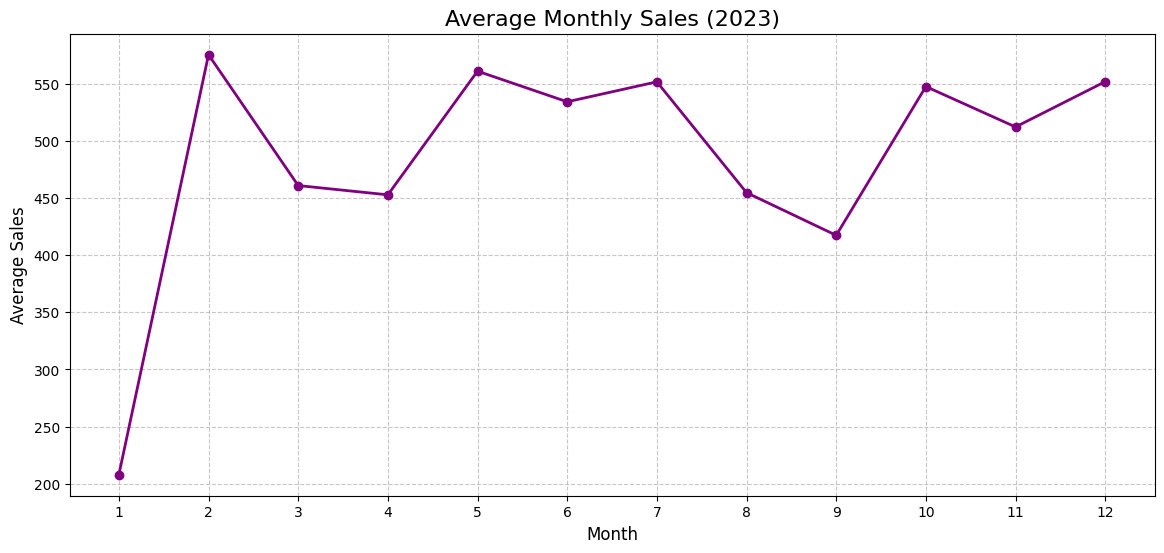

<Figure size 1400x600 with 0 Axes>

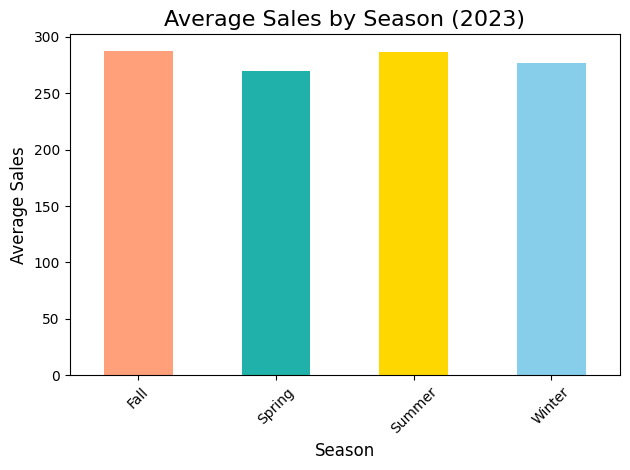

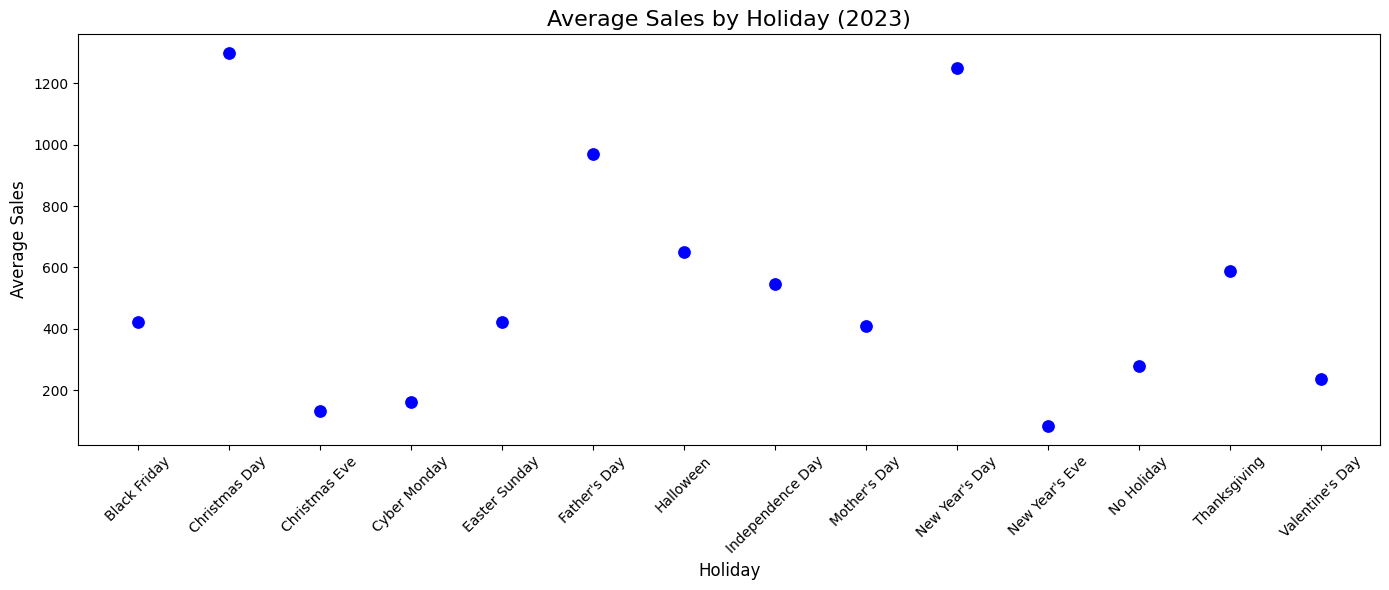

In [63]:
# Line Plot for Monthly Sales
plt.figure(figsize=(14, 6))
plt.plot(monthly_category_sales['Month'], monthly_category_sales['Average Sales'], marker='o', color='purple', linewidth=2)
plt.title('Average Monthly Sales (2023)', fontsize=16)
plt.xlabel('Month', fontsize=12)
plt.ylabel('Average Sales', fontsize=12)
plt.xticks(range(1, 13), fontsize=10)  # Ensure each month is displayed
plt.grid(True, linestyle='--', alpha=0.7)  # Add a grid for better readability
plt.show()

# Stacked Bar Chart for Seasonal Sales
plt.figure(figsize=(14, 6))
# Create the bar plot with specific colors
season_colors = ['#FFA07A', '#20B2AA', '#FFD700', '#87CEEB']  # Spring, Summer, Fall, Winter
seasonal_category_sales.plot(kind='bar', x='Season', y='Average Sales', color=season_colors, legend=False)
plt.title('Average Sales by Season (2023)', fontsize=16)
plt.xlabel('Season', fontsize=12)
plt.ylabel('Average Sales', fontsize=12)
# Rotate x-axis labels for better visibility
plt.xticks(rotation=45, fontsize=10)
plt.tight_layout()
plt.show()

# Scatter Plot for Holiday Sales
plt.figure(figsize=(14, 6))
sns.scatterplot(data=holiday_sales, x='Holiday', y='Average Sales', color='blue', s=100)
plt.title('Average Sales by Holiday (2023)', fontsize=16)
plt.xlabel('Holiday', fontsize=12)
plt.ylabel('Average Sales', fontsize=12)
plt.xticks(rotation=45, fontsize=10)
plt.tight_layout()
plt.show()

### Findings and Insights

* The line plot reveals significant fluctuations in sales, with a peak in February followed by a decline until May, stable performance from June to August, and a recovery towards the end of the year in November. These patterns suggest the influence of seasonal events, holidays, or promotions on sales trends.
* Seasonal Sales bar chart shows relatively consistent sales across seasons, with Fall and Summer slightly outperforming Spring and Winter. This aligns with the first plot's mid-year stability during the summer months and the late-year rebound in Fall, particularly November.

* Holiday scatter plot indicates that holidays like Black Friday, Christmas, and New Year's Day drive significantly higher sales. This correlates with the spike observed in November (Black Friday) and the recovery towards the end of the year (December holidays) in the monthly sales line plot.

### Analyze the Average sales by discounting and promotion status

In [64]:
# Create a DataFrame using groupby and agg functions to summarize the impact of discounts and promotional codes on sales within different categories.
promotion_discount_impact = merged_df.groupby(['Category', 'Discount Applied', 'Promo Code Used'], observed=False).agg(
    Total_Sales=('Sales', 'sum'),
    Avg_Sales=('Sales', 'mean'),
    Transaction_Count=('Sales', 'count')
).reset_index()
promotion_discount_impact

,Category,Discount Applied,Promo Code Used,Total_Sales,Avg_Sales,Transaction_Count
0,Accessories,False,False,138703.0,199.000000,697
1,Accessories,False,True,0.0,NaN,0
2,Accessories,True,False,0.0,NaN,0
3,Accessories,True,True,184831.0,340.388582,543
4,Clothing,False,False,200194.0,199.000000,1006
5,Clothing,False,True,0.0,NaN,0
6,Clothing,True,False,0.0,NaN,0
7,Clothing,True,True,287793.0,393.697674,731
8,Footwear,False,False,67660.0,199.000000,340
9,Footwear,False,True,0.0,NaN,0


### I will Visualize the Results

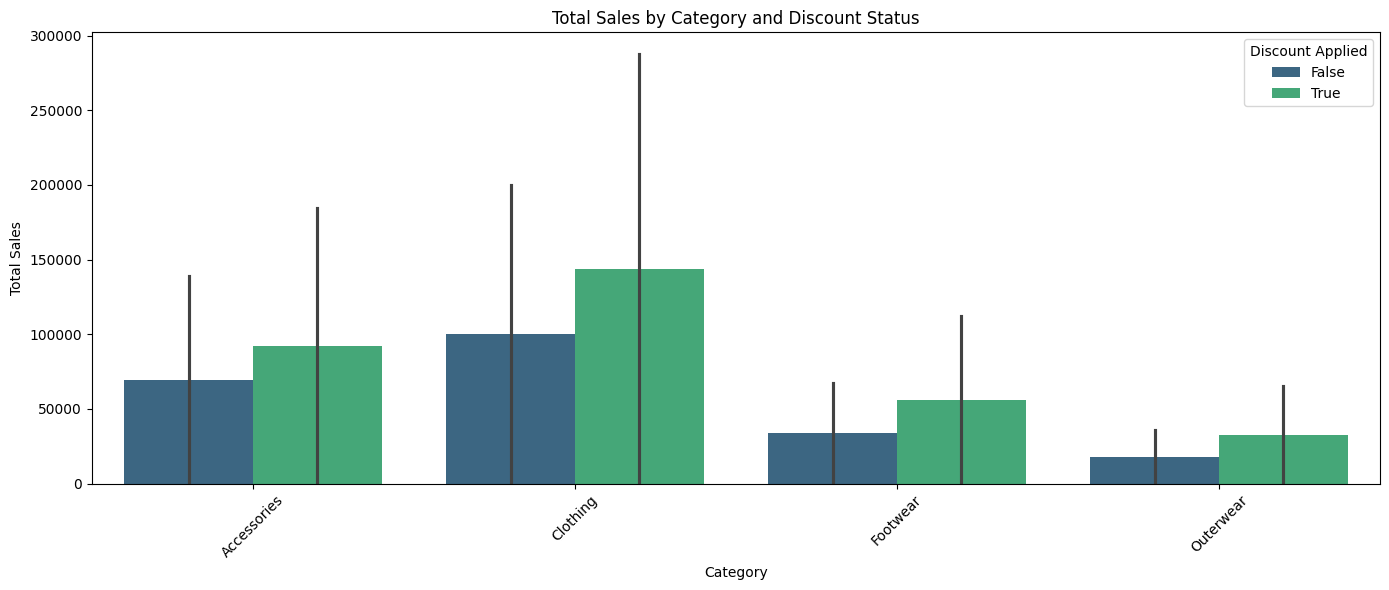

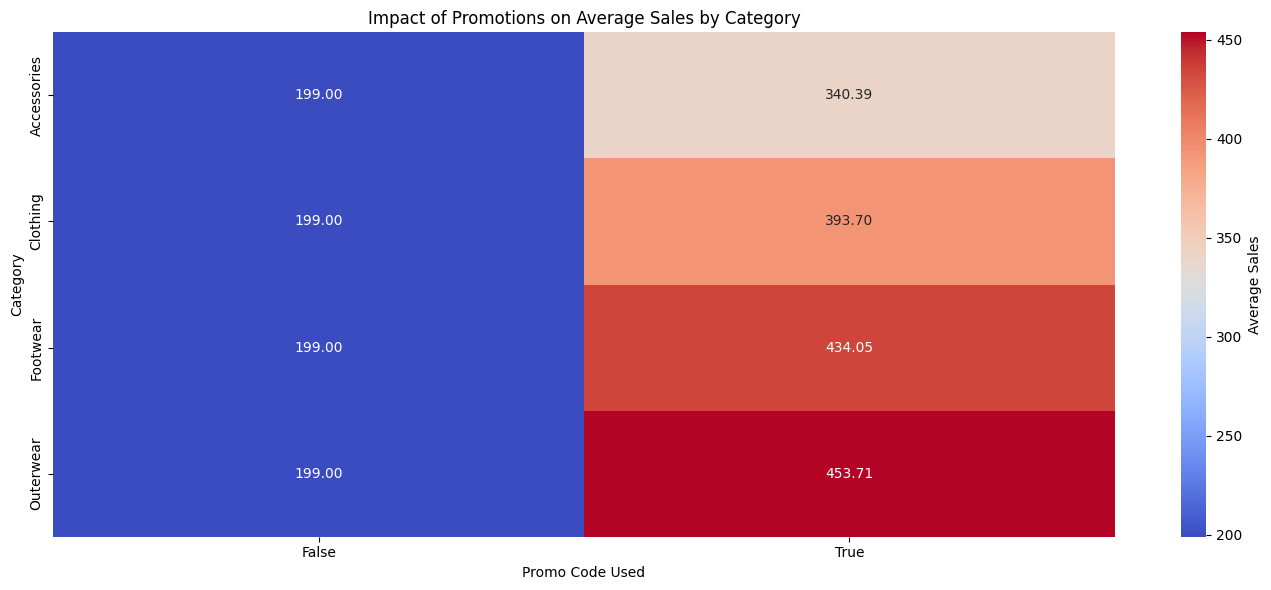

In [65]:
# Bar Plot for Total Sales by Category and Discount
plt.figure(figsize=(14, 6))
sns.barplot(data=promotion_discount_impact, x='Category', y='Total_Sales', hue='Discount Applied', palette='viridis')
plt.title('Total Sales by Category and Discount Status')
plt.xlabel('Category')
plt.ylabel('Total Sales')
plt.legend(title='Discount Applied')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Average Sales and Promotions by Category
# Create a pivot table for heatmap
heatmap_data = promotion_discount_impact.pivot_table(
    index='Category', columns='Promo Code Used', values='Avg_Sales', aggfunc='mean', observed=False
)
# Plot heatmap
plt.figure(figsize=(14, 6))
sns.heatmap(heatmap_data, annot=True, fmt='.2f', cmap='coolwarm', cbar_kws={'label': 'Average Sales'})
plt.title('Impact of Promotions on Average Sales by Category')
plt.xlabel('Promo Code Used')
plt.ylabel('Category')
plt.tight_layout()
plt.show()

### Findings and Insights 

* The bar plot shows that discounts generally boost total sales, especially in categories like Clothing and Footwear, where sales with discounts applied exceed those without.
However, the effect of discounts in categories like Accessories and Outerwear is less pronounced, indicating potentially lower sensitivity to promotional offers in these categories.
* The heatmap reveals that Outerwear and Footwear categories have the highest average sales under promotional conditions, with values of around 453.71 and 434.05, respectively.
Accessories, however, have consistently lower average sales compared to other categories, indicating that promotions have limited impact here.

### Analyze Customer Previous Purchases, Frequency of Purchases Trends, Review Rating and Subscription Status

Calculate the average Sales by Customer Frequency of Purchases, Previous Purchases, Subscription Status and Review Rating

In [66]:
# Aggregate sales by Frequency of Purchases
# Calculate the Average sales by  Frequency of Purchases
frequency_sales = merged_df.groupby('Frequency of Purchases')['Sales'].mean().reset_index()
# Sort the data by Frequency of Purchases
frequency_sales = frequency_sales.sort_values(by='Frequency of Purchases')

# Define ranges (bins) for grouping 'Previous Purchases' and assign corresponding labels
bins = [0, 10, 20, 30, 40, 50, merged_df['Previous Purchases'].max() + 1]
labels = ['0-10', '11-20', '21-30', '31-40', '41-50', '50+']  # Adjusted labels
# Create 'Previous Purchases Group' column
merged_df['Previous Purchases Group'] = pd.cut(merged_df['Previous Purchases'], bins=bins, labels=labels, right=False)
# Calculate the average sales by Previous Purchases Group
previous_purchases_sales = merged_df.groupby('Previous Purchases Group', observed=False)['Sales'].mean().reset_index()

# Compare average sales for subscribed vs. non-subscribed customers
# Calculate the Average sales by subscription status
subscription_sales = merged_df.groupby('Subscription Status')['Sales'].mean().reset_index()

# Group sales by Review Rating
# Calculate the Average sales by review rating
review_sales = merged_df.groupby('Review Rating')['Sales'].mean().reset_index()
# Sort the data by Review Rating
review_sales = review_sales.sort_values(by='Review Rating')

### I will Visualize the Results

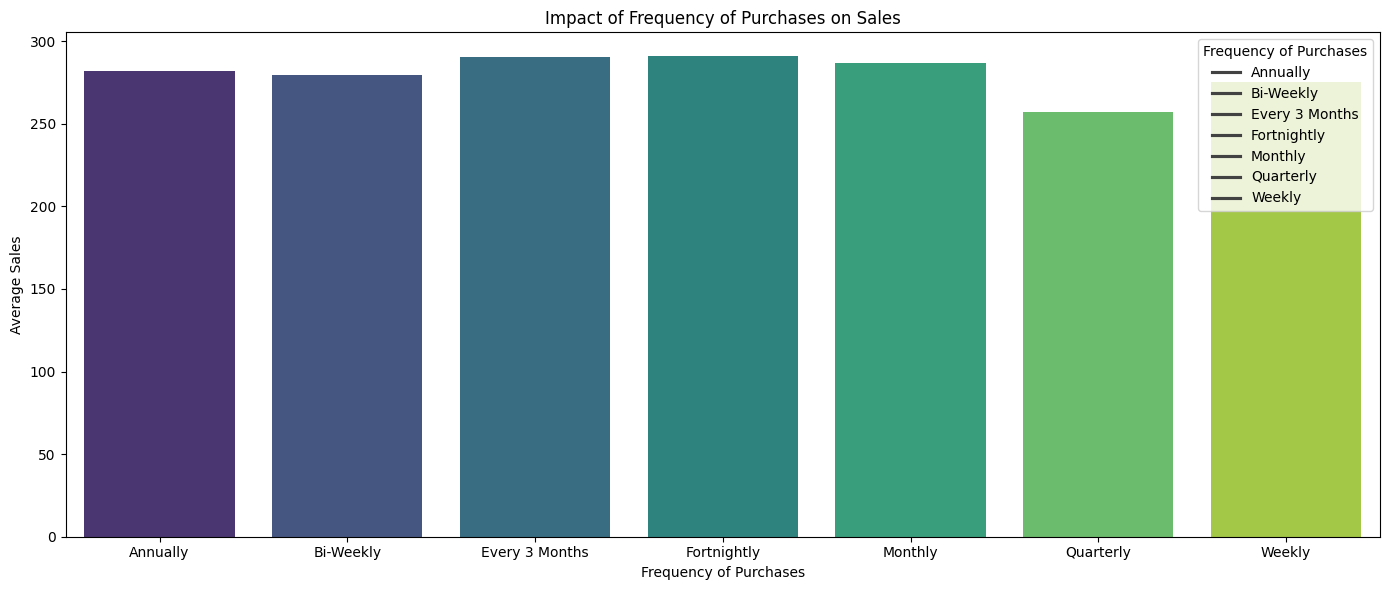

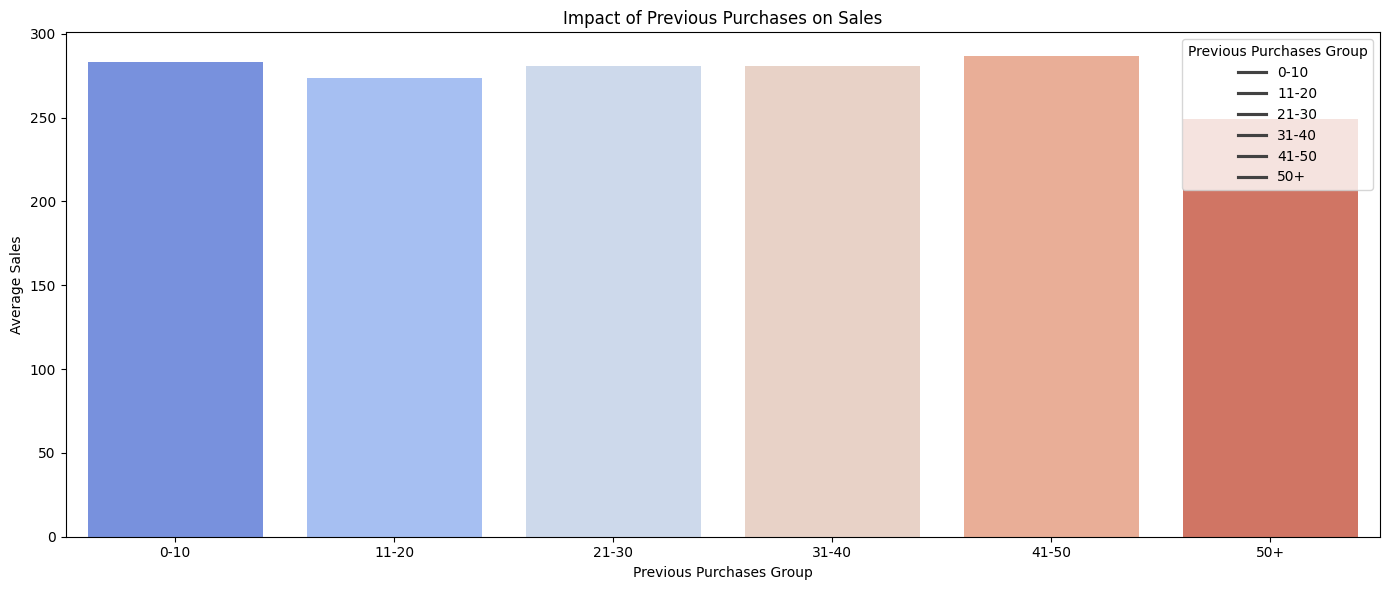

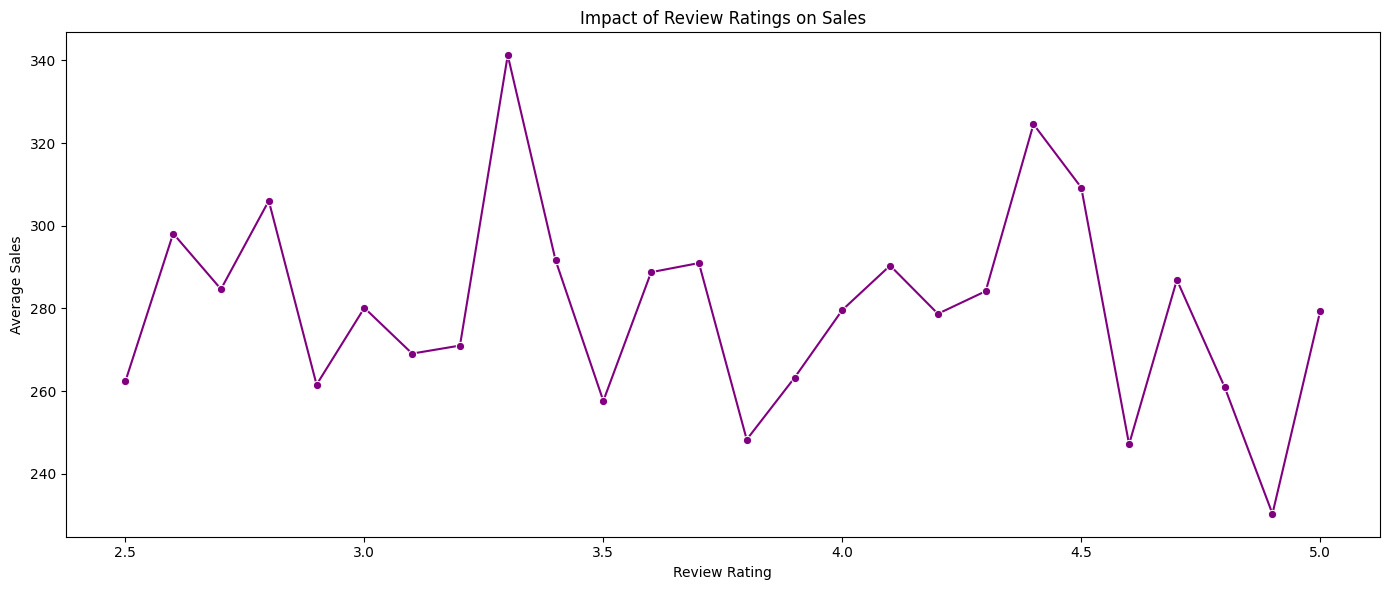

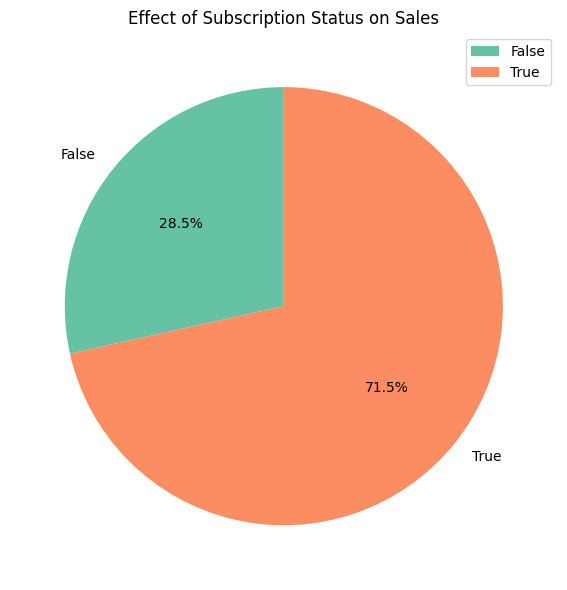

In [67]:
# Frequency of Purchases Bar Plot
plt.figure(figsize=(14, 6))
sns.barplot(
    data=frequency_sales, 
    x='Frequency of Purchases', 
    y='Sales', 
    hue='Frequency of Purchases', 
    palette='viridis', 
    dodge=False
)
# set the legend labels
legend_labels = frequency_sales['Frequency of Purchases'].unique()
plt.legend(legend_labels, title='Frequency of Purchases')
plt.title('Impact of Frequency of Purchases on Sales')
plt.xlabel('Frequency of Purchases')
plt.ylabel('Average Sales')
plt.tight_layout()
plt.show()

# Previous Purchases Group Bar Plot
plt.figure(figsize=(14, 6))
sns.barplot(
    data=previous_purchases_sales, 
    x='Previous Purchases Group', 
    y='Sales', 
    hue='Previous Purchases Group',  # Assign `hue` to match colors with categories
    palette='coolwarm', 
    dodge=False
)
# set legend labels
unique_groups = previous_purchases_sales['Previous Purchases Group'].unique()
plt.legend(unique_groups, title='Previous Purchases Group', loc='upper right')
plt.title('Impact of Previous Purchases on Sales')
plt.xlabel('Previous Purchases Group')
plt.ylabel('Average Sales')
plt.tight_layout()
plt.show()

# Review Ratings Line Plot
plt.figure(figsize=(14, 6))
sns.lineplot(data=review_sales, x='Review Rating', y='Sales', marker='o', color='purple')
plt.title('Impact of Review Ratings on Sales')
plt.xlabel('Review Rating')
plt.ylabel('Average Sales')
plt.tight_layout()
plt.show()

# Aggregate sales data by subscription status
subscription_sales_aggregated = subscription_sales.groupby('Subscription Status')['Sales'].mean()
# Create the pie plot
plt.figure(figsize=(14, 6))
colors = sns.color_palette('Set2', len(subscription_sales_aggregated))
subscription_sales_aggregated.plot.pie(
    autopct='%1.1f%%', startangle=90, colors=colors, legend=True, labels=subscription_sales_aggregated.index
)
plt.title('Effect of Subscription Status on Sales')
plt.ylabel('')  # Hide the default y-axis label
plt.tight_layout()
plt.show()

### Findings and Insights 

* Purchase Frequency bar plot shows that customers who purchase more frequently generate higher average sales compared to occasional buyers, emphasizing the importance of encouraging repeat purchases.
* Previous Purchases bar plot shows that loyal customers with a history of more purchases contribute significantly to sales, suggesting that retaining repeat customers should be a focus for marketing efforts.
* Review Ratings line plot shows that higher review ratings are associated with increased average sales, indicating that well-rated products are more likely to perform well and should be prioritized in marketing.
* Subscription Status pie plot shows that Subscribed customers consistently drive higher sales, suggesting the value of subscription models and the need to target non-subscribers with incentives to subscribe.

### Recommendations

* Optimize Inventory:
Stock more popular items during high-demand seasons (e.g., Black Friday). Group less successful products with best-sellers to boost visibility.
* Targeted Marketing:
Focus campaigns on young adults and seniors, tailoring messages to their preferences. Use holiday-specific promotions to drive seasonal sales.

* Strategic Discounts:
Offer discounts on top-performing categories like clothing while monitoring profit margins. Incentivize repeat buyers with loyalty rewards.

* Promote Subscriptions:
Highlight benefits like free shipping and exclusive discounts to attract new subscribers. Offer limited-time trials to increase engagement.

* Leverage Reviews:
Showcase highly-rated products in ads and on product pages. Use customer testimonials to build trust and boost sales.

* Data-Driven Adjustments:
Use past performance data to refine strategies. Test and tweak campaigns to maximize their effectiveness based on customer feedback.


#### 